## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

## Import Data

In [4]:
gas_turbine_data = pd.read_csv('gas_turbines.csv')
gas_turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## EDA

In [5]:
gas_turbine_data.shape

(15039, 11)

In [6]:
gas_turbine_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gas_turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
gas_turbine_data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [12]:
gas_turbine_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [14]:
gas_turbine_data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [15]:
# moving the TEY column to the 0th position in the table :

last_col = gas_turbine_data.pop('TEY')
gas_turbine_data.insert(0 , 'TEY', last_col)

In [16]:
gas_turbine_data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [17]:
# Visualization

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

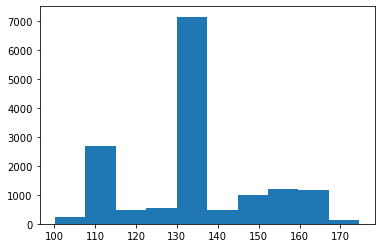

In [18]:
plt.hist(gas_turbine_data["TEY"])

In [20]:
# Assigning predictor variables -  x and 
#             response variable - y 


In [21]:
x = gas_turbine_data.iloc[:,1:]
y = gas_turbine_data[['TEY']]

In [22]:
# Standardizing  

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [24]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) 
x_test_scaled  = scaler_test.fit_transform(x_test) 

In [25]:
x_train_scaled.shape , x_test_scaled.shape , y_train.shape  , y_test.shape

((12031, 10), (3008, 10), (12031, 1), (3008, 1))

In [30]:
y_test = y_test.values

In [31]:
y_test

array([[134.46],
       [111.88],
       [133.72],
       ...,
       [146.31],
       [150.07],
       [111.77]])

In [27]:
# Since we have continuous ouput, AF is not required in the o/p layer

model = Sequential()
model.add( Dense(  50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 10)) # input layer
model.add( Dense( 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( 1  , kernel_initializer = 'normal' )) # o/p layer




In [28]:
# Compile the model

model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['MeanSquaredError'])

In [29]:
# Fit the model 

model.fit(x_train_scaled, y_train , batch_size = 50, epochs = 100,  verbose = 1)



Epoch 1/100
241/241 [==============================] - 1s 2ms/step - loss: 17299.1348 - mean_squared_error: 17299.1348
Epoch 2/100
241/241 [==============================] - 0s 1ms/step - loss: 15669.2998 - mean_squared_error: 15669.2998
Epoch 3/100
241/241 [==============================] - 0s 1ms/step - loss: 14396.5713 - mean_squared_error: 14396.5713
Epoch 4/100
241/241 [==============================] - 0s 2ms/step - loss: 13235.4473 - mean_squared_error: 13235.4473
Epoch 5/100
241/241 [==============================] - 0s 2ms/step - loss: 12156.5195 - mean_squared_error: 12156.5195
Epoch 6/100
241/241 [==============================] - 0s 2ms/step - loss: 11147.9854 - mean_squared_error: 11147.9844
Epoch 7/100
241/241 [==============================] - 0s 2ms/step - loss: 10203.0918 - mean_squared_error: 10203.0918
Epoch 8/100
241/241 [==============================] - 1s 2ms/step - loss: 9316.9189 - mean_squared_error: 9316.9189
Epoch 9/100
241/241 [=============================

In [32]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            
            # Defining the first layer of the model
            model.add(Dense(50, input_dim = x_train_scaled.shape[1], kernel_initializer = 'normal', activation ='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(20, kernel_initializer = 'normal', activation = 'tanh'))
 
            model.add(Dense(1, kernel_initializer = 'normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size = batch_trial, epochs = epochs_trial,  verbose = 0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable = bestParamTable.append(pd.DataFrame(data = [[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns = ['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable


In [33]:
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

batch_size: 5 - epochs: 5 Accuracy: 98.44976800624164
batch_size: 5 - epochs: 10 Accuracy: 99.60725995009993
batch_size: 5 - epochs: 50 Accuracy: 99.61446991993587
batch_size: 5 - epochs: 100 Accuracy: 99.67236075944346
batch_size: 10 - epochs: 5 Accuracy: 80.83532894444518
batch_size: 10 - epochs: 10 Accuracy: 98.66390928563644
batch_size: 10 - epochs: 50 Accuracy: 99.48574427798796
batch_size: 10 - epochs: 100 Accuracy: 99.69314842257042
batch_size: 15 - epochs: 5 Accuracy: 58.68623873397705
batch_size: 15 - epochs: 10 Accuracy: 89.83573862464813
batch_size: 15 - epochs: 50 Accuracy: 99.66887291096783
batch_size: 15 - epochs: 100 Accuracy: 99.65046014001243
batch_size: 20 - epochs: 5 Accuracy: 45.989732591011766
batch_size: 20 - epochs: 10 Accuracy: 81.04902770279632
batch_size: 20 - epochs: 50 Accuracy: 99.64837541816246
batch_size: 20 - epochs: 100 Accuracy: 99.71897216742988


,batchsize,epochs,Accuracy
0,5,5,98.449768
0,5,10,99.607260
0,5,50,99.614470
0,5,100,99.672361
0,10,5,80.835329
0,10,10,98.663909
0,10,50,99.485744
0,10,100,99.693148
0,15,5,58.686239
0,15,10,89.835739


In [34]:
finalParamTable = finalParamTable.reset_index()

In [35]:
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index          0.000000
batchsize     20.000000
epochs       100.000000
Accuracy      99.718972
Name: 15, dtype: float64

In [36]:
# Training model

In [38]:
# Compile the model

model.compile(optimizer ='adam', loss = 'mean_squared_error')



In [37]:
# fitting the model

model.fit(x_train_scaled,y_train, batch_size = 20 , epochs = 100, verbose = 0)

In [39]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 



In [40]:
# creating table with test price & predicted price for test
final_table = pd.DataFrame(x_test)
final_table['Price'] = y_test
final_table['Predicted Price'] = y_predict_test
print(final_table.shape)
final_table.head(10)

(3008, 12)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Price,Predicted Price
13312,24.0930,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.26430,60.954,134.46,134.769211
12627,20.4500,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.69370,56.658,111.88,112.716385
6393,20.2620,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.96250,64.937,133.72,134.227417
4990,26.8620,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.57120,64.836,133.79,133.897797
12462,19.4090,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.29960,58.706,110.77,111.426636
7405,2.2158,1013.1,88.695,3.3709,19.387,1058.9,550.17,10.624,4.27640,99.759,113.32,114.301422
10993,23.8520,1002.2,84.186,3.7871,25.392,1089.7,550.11,12.088,0.83578,59.426,133.77,133.867462
9488,12.3950,1019.5,95.381,4.2837,23.225,1079.4,549.60,11.498,2.01980,75.260,128.98,129.141541
14201,12.3590,1022.7,82.295,5.1559,32.518,1100.1,528.98,13.971,0.87760,66.416,159.42,160.303329
9757,8.6376,1001.6,98.271,5.9309,32.105,1100.0,530.69,13.862,10.75000,102.130,161.86,162.604126


In [42]:
#Computing the absolute percent error
APE = 100*(abs(final_table['Price']-final_table['Predicted Price'])/final_table['Price'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
final_table['APE'] = APE
final_table.head()

The Accuracy for Test Data -- ANN model =  99.66113518817282


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Price,Predicted Price,APE
13312,24.093,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.2643,60.954,134.46,134.769211,0.229965
12627,20.450,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.6937,56.658,111.88,112.716385,0.747573
6393,20.262,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.9625,64.937,133.72,134.227417,0.379462
4990,26.862,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.5712,64.836,133.79,133.897797,0.080572
12462,19.409,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.2996,58.706,110.77,111.426636,0.592792
